<a href="https://colab.research.google.com/github/sathishrouthu/BigMart-Sales_Prediction/blob/main/EDA-BigMart%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train  = pd.read_csv('https://raw.githubusercontent.com/sathishrouthu/BigMart-Sales_Prediction/main/train.csv')

test = pd.read_csv('https://raw.githubusercontent.com/sathishrouthu/BigMart-Sales_Prediction/main/test.csv')

![" s "](desc.jpg "img")

In [3]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
data = pd.concat([train,test],axis=0,keys=['train','test'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14204 entries, ('train', 0) to ('test', 5680)
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


### Univariate Analysis

#### Target Variable distribution

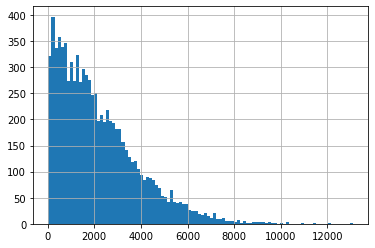

In [8]:
data['Item_Outlet_Sales'].hist(bins=100)

Right Skewed, needs some transformation

#### independent (Numeric variables)

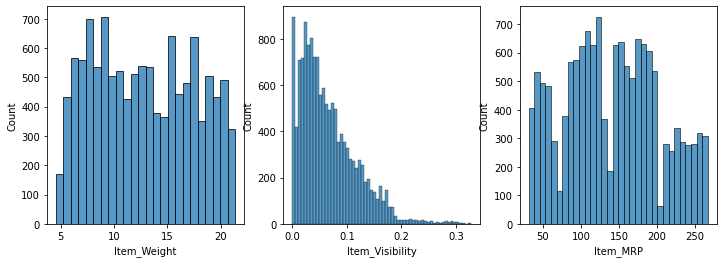

In [9]:
num_var = ['Item_Weight','Item_Visibility','Item_MRP']
plt.figure(figsize=(12,4))
for i,var in enumerate(num_var):
    plt.subplot(1,3,i+1)
    sns.histplot(data=data,x=var,fill='blue')

- There seems to be No clear cut pattern in Item_Weight
- Item_Visibility is Right Skewed and needs transformation
- there are 4 different distribution for Item_MRP 

#### Inependent (Catergorical variables)

In [10]:
cat_var=['Item_Fat_Content']

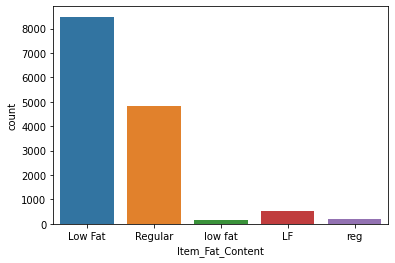

In [11]:
sns.countplot(data=data,x='Item_Fat_Content')

here the LF and Low Fat are same

Regular and reg are same

we can combine them

In [15]:
data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [33]:
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [32]:
test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

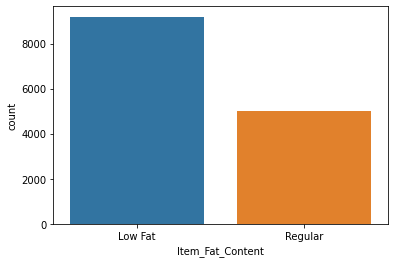

In [18]:
sns.countplot(data=data,x='Item_Fat_Content')

In [19]:
cat_var=['Item_Type','Outlet_Size','Outlet_Identifier']

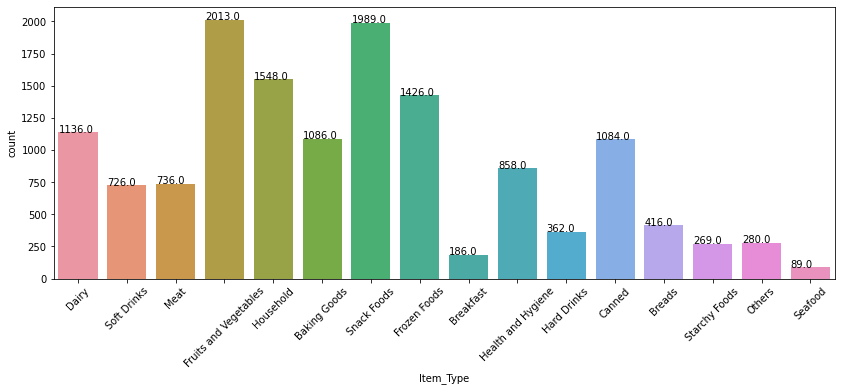

In [20]:
plt.figure(figsize=(14,5))
ax= sns.countplot(data=data,x='Item_Type',)
plt.xticks(rotation=45)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

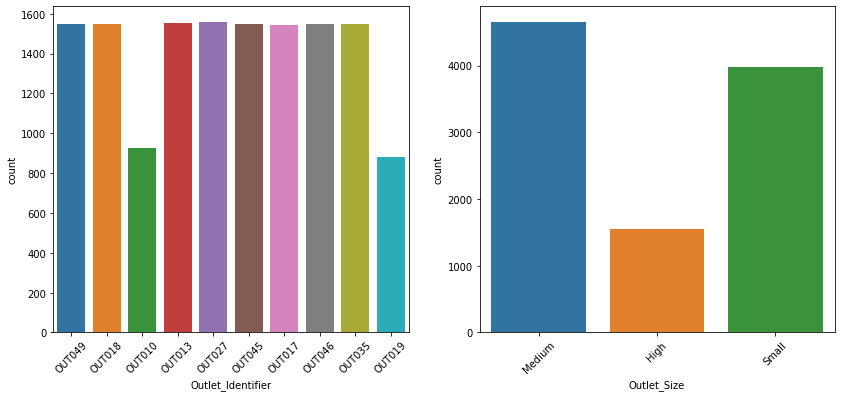

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1= sns.countplot(data=data,x='Outlet_Identifier',)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
ax2= sns.countplot(data=data,x='Outlet_Size',)
plt.xticks(rotation=45)


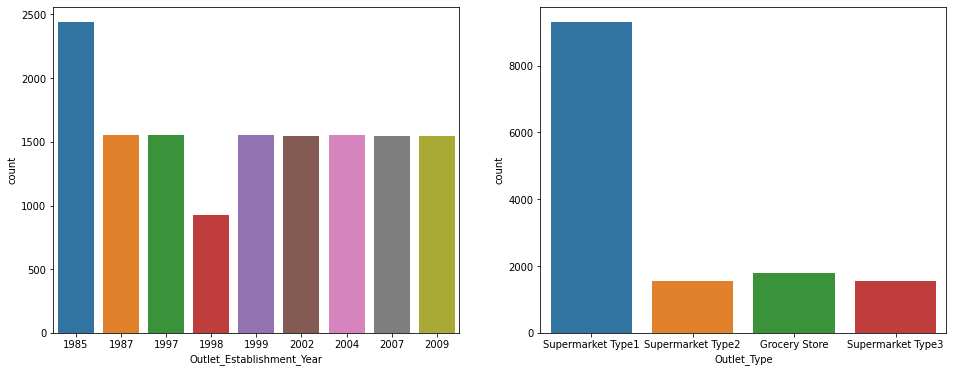

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=data,x='Outlet_Establishment_Year')

plt.subplot(1,2,2)
sns.countplot(data=data,x='Outlet_Type')

- Lesser number of observations in the data for the outlets established in the year 1998 as
compared to the other years.
- Supermarket Type 1 seems to be the most popular category of Outlet_Type.

# BiVariate Analysis

In [23]:
#  Target Variable vs Independent Numerical Variables

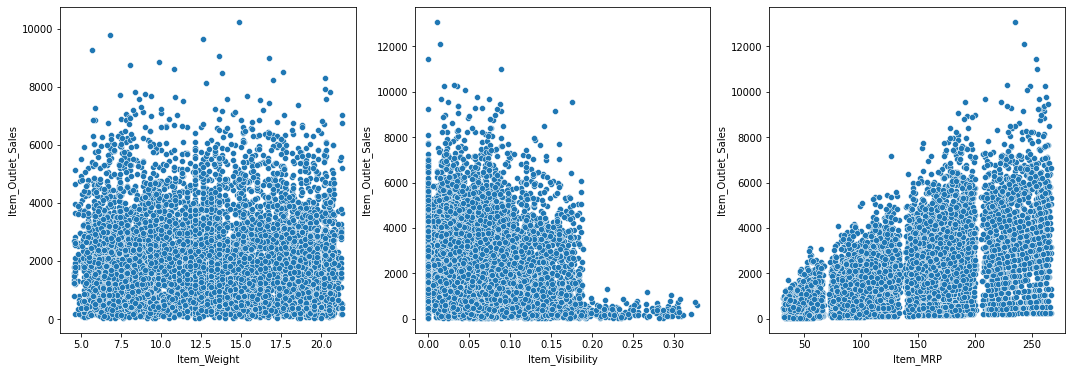

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.scatterplot(x=train.Item_Weight, y=train.Item_Outlet_Sales)
plt.subplot(1,3,2)
sns.scatterplot(x=train.Item_Visibility, y=train.Item_Outlet_Sales)
plt.subplot(1,3,3)
sns.scatterplot(x=train.Item_MRP, y=train.Item_Outlet_Sales)

- Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
- In Item Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
- In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

In [25]:
#  Target Variable vs Independent Categorical Variables

We could have used boxplots here, but instead we'll use the violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

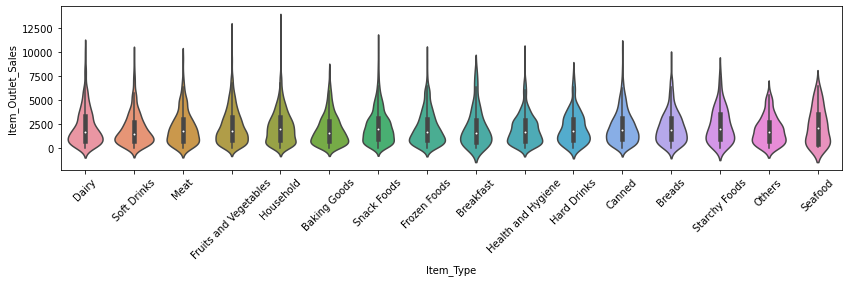

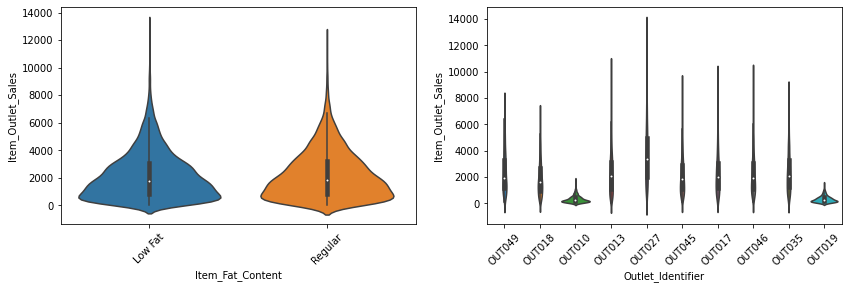

In [36]:
cat_var = ['Item_Type','Item_Fat_Content','Outlet_Identifier']
plt.figure(figsize=(14,3))
sns.violinplot(data=train,x='Item_Type',y='Item_Outlet_Sales',style="whitegrid")
plt.xticks(rotation=45)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.violinplot(data=train,x='Item_Fat_Content',y='Item_Outlet_Sales',style="whitegrid")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.violinplot(data=train,x='Outlet_Identifier',y='Item_Outlet_Sales',style="whitegrid")
plt.xticks(rotation=45)

- Distribution of Item_Outlet_Sales across the categories of Item Type is not very distinct and same is the case with Item_Fat_Content.
- The distribution for OUTO10 and OUTO19 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

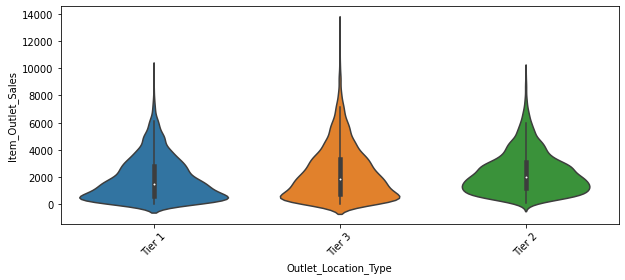

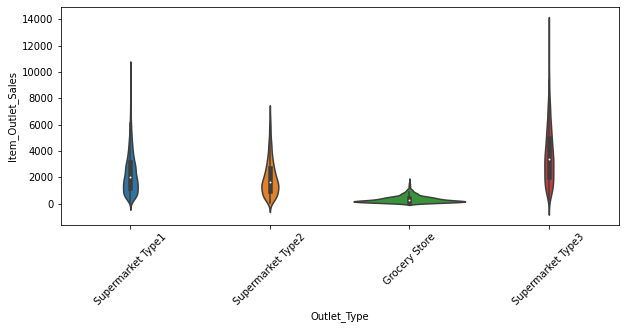

In [40]:
plt.figure(figsize=(10,4))
sns.violinplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',style="whitegrid")
plt.xticks(rotation=45)
plt.figure(figsize=(10,4))
sns.violinplot(data=train,x='Outlet_Type',y='Item_Outlet_Sales',style="whitegrid")
plt.xticks(rotation=45)

- Tier 1 and Tier 3 locations of Outlet_Location Type look similar.
- In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.